In [483]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures, StandardScaler

house_df = pd.read_csv('../../kc_house_data.csv')

In [484]:
"""
Imports, loading dataframe
"""

'\nImports, loading dataframe\n'

## Exercise 1
a) Create and train simple regression model of sqft_living to price.  
b) Evaluate and visualise created model.  
c) Create and plot higher order polynomial regression models.

In [485]:
#a)

X = house_df.sqft_living.values.reshape(-1,1)[:1000]
y = house_df.price.values.reshape(-1)[:1000]

model = LinearRegression() 

#Your code:
model.fit(X, y)

#Hint: .fit()

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [486]:
"""
Creating and fitting the model
"""

'\nCreating and fitting the model\n'

Coefficient: [269.46205468], Intercept: -32304.654721028113
R^2 Score: 0.49670880166311393


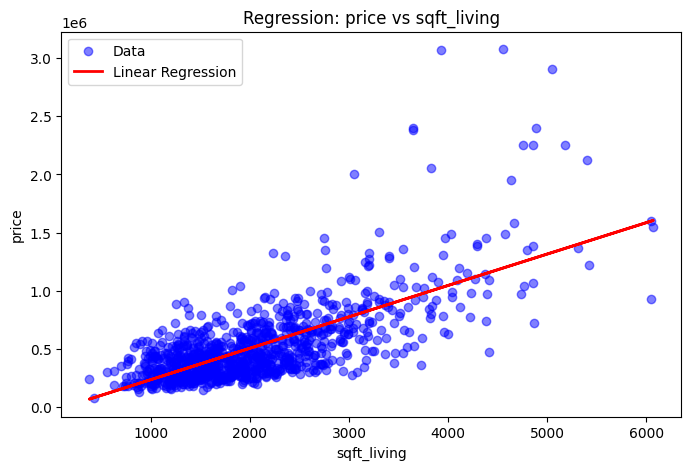

In [487]:
#b)

#Your code:


print(f"Coefficient: {model.coef_}, Intercept: {model.intercept_}")
print(f"R^2 Score: {model.score(X, y)}")

y_pred = model.predict(X)

plt.figure(figsize=(8,5))
plt.scatter(X, y, color='blue', alpha=0.5, label='Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.title('Regression: price vs sqft_living')
plt.legend()
plt.show()

#Hint: model.predict(), model.intercept_,  model.coef_, model.score()

In [488]:
"""
predict() predicts values for given inputs
intercept() and coef_ give model parameters y = ax+b, then intercept = b, coef_ = a
score() gives R^2 score of the model (the closer to 1.0 the better)
In our case it is around 0.5, which is not very good.
So our y ~= 269.5x - 32304.5
"""

'\npredict() predicts values for given inputs\nintercept() and coef_ give model parameters y = ax+b, then intercept = b, coef_ = a\nscore() gives R^2 score of the model (the closer to 1.0 the better)\nIn our case it is around 0.5, which is not very good.\nSo our y ~= 269.5x - 32304.5\n'

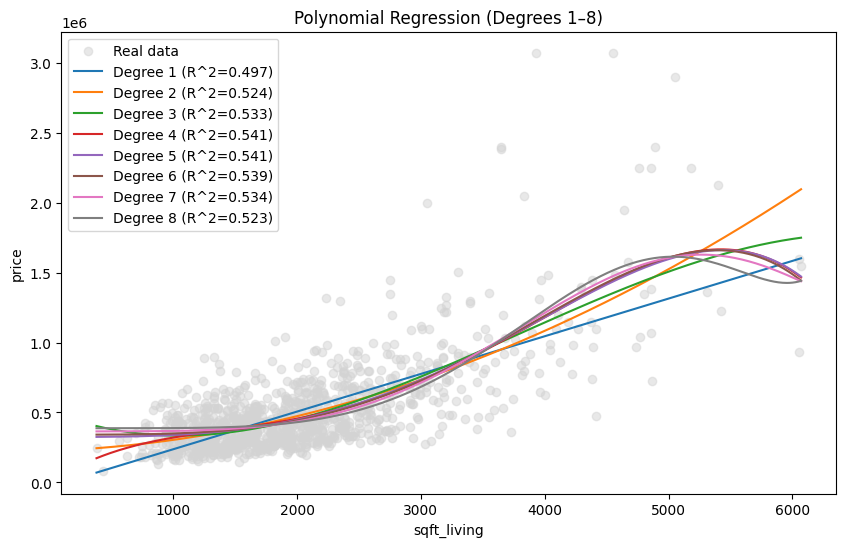

In [489]:
#c)

X_plot = np.linspace(X.min(), X.max(), 500).reshape(-1, 1)

plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='lightgray', alpha=0.5, label='Real data')

for order in range(1, 9):
    poly = PolynomialFeatures(order, include_bias=False)
    X_order = poly.fit_transform(X)
    X_plot_order = poly.transform(X_plot)
    
    model = LinearRegression()
    model.fit(X_order, y)
    y_pred_plot = model.predict(X_plot_order)
    
    plt.plot(X_plot, y_pred_plot, label=f'Degree {order} (R^2={model.score(X_order, y):.3f})')

plt.title('Polynomial Regression (Degrees 1–8)')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend()
plt.show()



In [490]:
"""
so the best model is order 4 with R^2 = 0.5415
plot shows how polynomial regression fits the data with increasing complexity.
degree 1 is linear regression, higher degrees capture more complexity but risk overfitting.
"""


'\nso the best model is order 4 with R^2 = 0.5415\nplot shows how polynomial regression fits the data with increasing complexity.\ndegree 1 is linear regression, higher degrees capture more complexity but risk overfitting.\n'

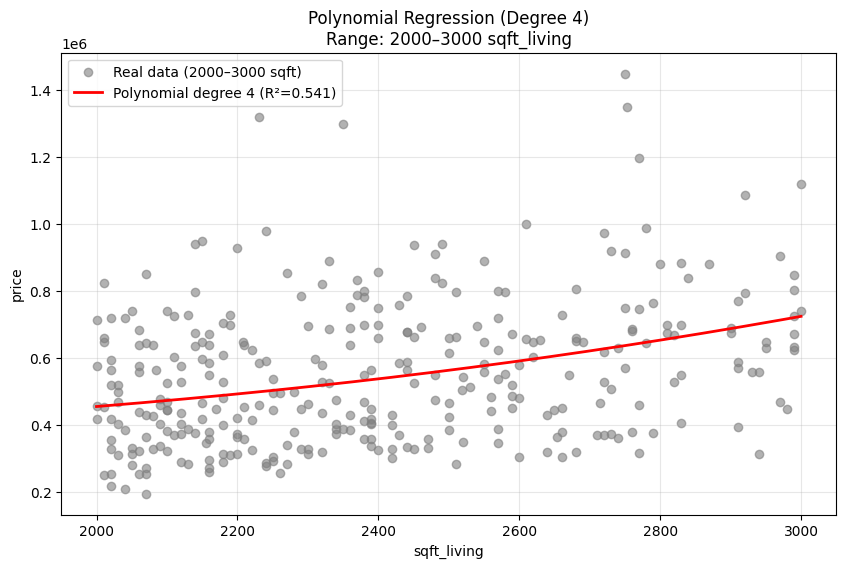

In [491]:
"""We can dive even further and check how polynomial regression affects prices in 2000-3000 sqft range in poly order 4."""
mask = (X[:, 0] >= 2000) & (X[:, 0] <= 3000)
X_focus = X[mask]
y_focus = y[mask]

X_plot = np.linspace(2000, 3000, 500).reshape(-1, 1)

poly = PolynomialFeatures(degree=4, include_bias=False)
X_poly = poly.fit_transform(X)
X_plot_poly = poly.transform(X_plot)

model = LinearRegression()
model.fit(X_poly, y)

y_pred_plot = model.predict(X_plot_poly)

plt.figure(figsize=(10, 6))
plt.scatter(X_focus, y_focus, color='gray', alpha=0.6, label='Real data (2000–3000 sqft)')
plt.plot(X_plot, y_pred_plot, color='red', linewidth=2, label=f'Polynomial degree 4 (R²={model.score(X_poly, y):.3f})')

plt.title('Polynomial Regression (Degree 4)\nRange: 2000–3000 sqft_living')
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

## Exercise 2
In reality, we are not given the full dataset, so we need to create models which are able to handle unknown data.  
a) Split your data into training sample and test sample and repeat exercise 1 c). Plot training and test errors for all models. 

Degree 1: train RMSE = 227807.90, test RMSE = 251212.02, train R^2 = 0.5260, test R^2 = 0.5080
Degree 2: train RMSE = 256257.79, test RMSE = 301110.50, train R^2 = 0.4003, test R^2 = 0.2931
Degree 3: train RMSE = 276592.14, test RMSE = 340332.58, train R^2 = 0.3013, test R^2 = 0.0970
Degree 4: train RMSE = 303125.56, test RMSE = 359343.57, train R^2 = 0.1608, test R^2 = -0.0067
Degree 5: train RMSE = 313643.02, test RMSE = 355248.36, train R^2 = 0.1016, test R^2 = 0.0161
Degree 6: train RMSE = 317357.11, test RMSE = 354466.69, train R^2 = 0.0802, test R^2 = 0.0204
Degree 7: train RMSE = 326155.30, test RMSE = 358256.76, train R^2 = 0.0285, test R^2 = -0.0006
Degree 8: train RMSE = 326152.31, test RMSE = 358299.72, train R^2 = 0.0285, test R^2 = -0.0009


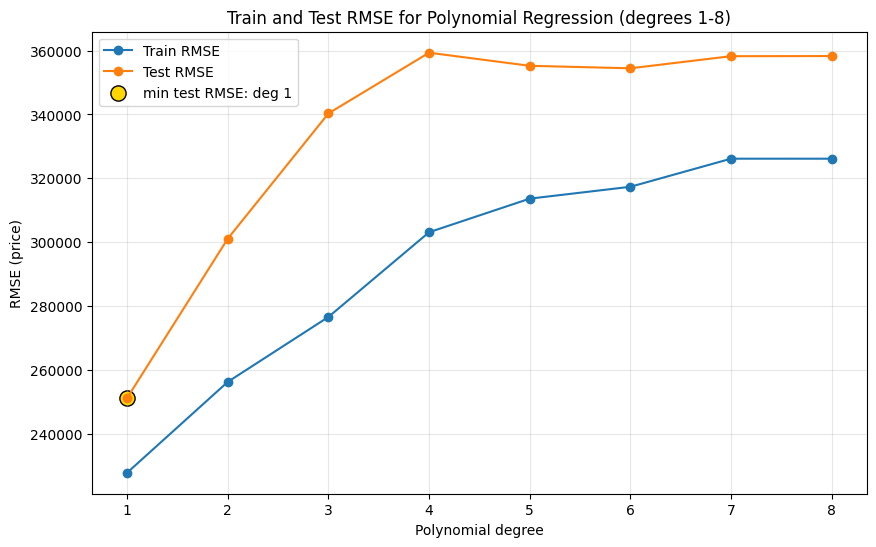

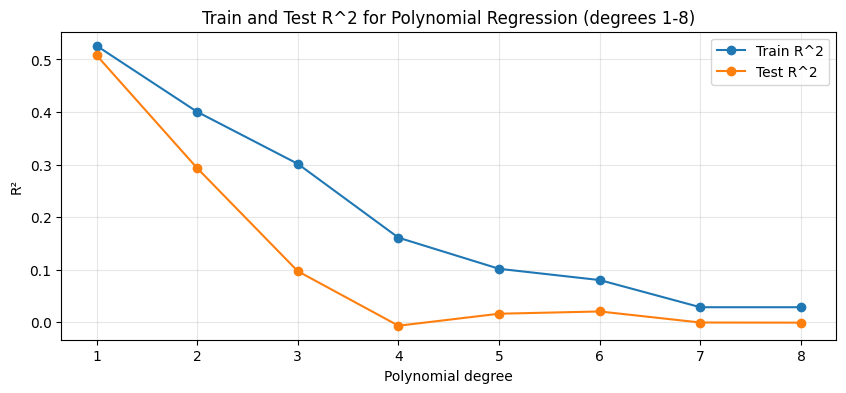

In [492]:
#a)

degrees = list(range(1, 9))
train_rmses = []
test_rmses = []
train_r2 = []
test_r2 = []

for order in degrees:
    X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_order, y, test_size=0.3, random_state=44)

    poly = PolynomialFeatures(order, include_bias=False)
    X_train = poly.fit_transform(X_train_raw)
    X_test = poly.transform(X_test_raw)
    
    #fitting model
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    #predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    #RMSE i R^2
    train_rmse = math.sqrt(mean_squared_error(y_train, y_train_pred))
    test_rmse = math.sqrt(mean_squared_error(y_test, y_test_pred))
    train_rmses.append(train_rmse)
    test_rmses.append(test_rmse)
    
    train_r2.append(model.score(X_train, y_train))
    test_r2.append(model.score(X_test, y_test))
    
    print(f"Degree {order}: train RMSE = {train_rmse:.2f}, test RMSE = {test_rmse:.2f}, train R^2 = {train_r2[-1]:.4f}, test R^2 = {test_r2[-1]:.4f}")

# Wykres RMSE vs degree
plt.figure(figsize=(10,6))
plt.plot(degrees, train_rmses, marker='o', linestyle='-', label='Train RMSE')
plt.plot(degrees, test_rmses, marker='o', linestyle='-', label='Test RMSE')
plt.xticks(degrees)
plt.xlabel('Polynomial degree')
plt.ylabel('RMSE (price)')
plt.title('Train and Test RMSE for Polynomial Regression (degrees 1-8)')
plt.grid(alpha=0.3)
plt.legend()

#minimal test RMSE
min_test_idx = int(np.argmin(test_rmses))
min_degree = degrees[min_test_idx]
min_test_val = test_rmses[min_test_idx]
plt.scatter([min_degree], [min_test_val], s=120, edgecolor='k', facecolor='gold', label=f'min test RMSE: deg {min_degree}')
plt.legend()
plt.show()

#R^2 vs degree
plt.figure(figsize=(10,4))
plt.plot(degrees, train_r2, marker='o', label='Train R^2')
plt.plot(degrees, test_r2, marker='o', label='Test R^2')
plt.xticks(degrees)
plt.xlabel('Polynomial degree')
plt.ylabel('R²')
plt.title('Train and Test R^2 for Polynomial Regression (degrees 1-8)')
plt.grid(alpha=0.3)
plt.legend()
plt.show()

    

In [493]:
"""
Interpretation:
As the polynomial degree increases from 1 to 8, both training and test accuracy (R²)
decrease, and RMSE values increase. This unexpected behavior happens because the
feature 'sqft_living' has large numeric values (in thousands). When these values are
raised to higher powers (x², x³, ... x⁸), they become extremely large, causing numerical
instability and poor regression fitting.

As a result, the model performs worse even on the training data (numerical underfitting).
To fix this, 'sqft_living' should be standardized (for example, using StandardScaler)
before applying PolynomialFeatures. After scaling, the training R² will increase with
polynomial degree, and the test R² will show the typical overfitting pattern — improving
first, then decreasing for higher degrees.
"""

"\nInterpretation:\nAs the polynomial degree increases from 1 to 8, both training and test accuracy (R²)\ndecrease, and RMSE values increase. This unexpected behavior happens because the\nfeature 'sqft_living' has large numeric values (in thousands). When these values are\nraised to higher powers (x², x³, ... x⁸), they become extremely large, causing numerical\ninstability and poor regression fitting.\n\nAs a result, the model performs worse even on the training data (numerical underfitting).\nTo fix this, 'sqft_living' should be standardized (for example, using StandardScaler)\nbefore applying PolynomialFeatures. After scaling, the training R² will increase with\npolynomial degree, and the test R² will show the typical overfitting pattern — improving\nfirst, then decreasing for higher degrees.\n"

After standard scaling:
Degree 1: train RMSE = 235675.66, test RMSE = 252737.02, train R^2 = 0.4927, test R^2 = 0.5020
After standard scaling:
Degree 2: train RMSE = 228751.97, test RMSE = 247234.50, train R^2 = 0.5221, test R^2 = 0.5235
After standard scaling:
Degree 3: train RMSE = 226619.78, test RMSE = 244777.14, train R^2 = 0.5310, test R^2 = 0.5329
After standard scaling:
Degree 4: train RMSE = 223447.23, test RMSE = 245390.72, train R^2 = 0.5440, test R^2 = 0.5305
After standard scaling:
Degree 5: train RMSE = 222418.97, test RMSE = 247194.77, train R^2 = 0.5482, test R^2 = 0.5236
After standard scaling:
Degree 6: train RMSE = 220239.56, test RMSE = 253475.15, train R^2 = 0.5570, test R^2 = 0.4991
After standard scaling:
Degree 7: train RMSE = 219961.12, test RMSE = 255407.72, train R^2 = 0.5581, test R^2 = 0.4914
After standard scaling:
Degree 8: train RMSE = 219959.99, test RMSE = 255246.91, train R^2 = 0.5581, test R^2 = 0.4921


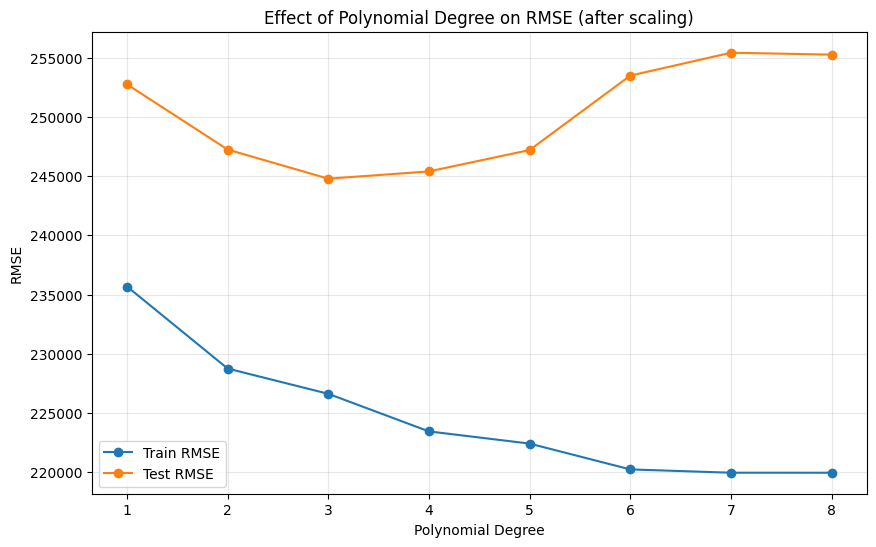

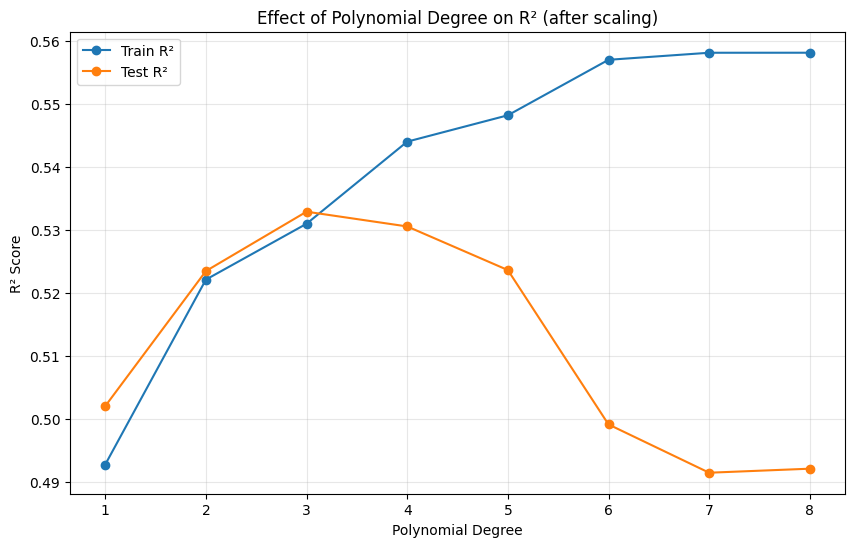

In [494]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

train_rmse = []
test_rmse = []
train_r2 = []
test_r2 = []

for order in range(1, 9):
    poly = PolynomialFeatures(order, include_bias=False)
    X_poly = poly.fit_transform(X_scaled)
    
    X_train, X_test, y_train, y_test = train_test_split(X_poly, y, test_size=0.3, random_state=44)
    
    model = LinearRegression()
    model.fit(X_train, y_train)
    
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    train_rmse.append(np.sqrt(mean_squared_error(y_train, y_train_pred)))
    test_rmse.append(np.sqrt(mean_squared_error(y_test, y_test_pred)))
    train_r2.append(model.score(X_train, y_train))
    test_r2.append(model.score(X_test, y_test))
    print("After standard scaling:")
    print(f"Degree {order}: train RMSE = {train_rmse[-1]:.2f}, test RMSE = {test_rmse[-1]:.2f}, train R^2 = {train_r2[-1]:.4f}, test R^2 = {test_r2[-1]:.4f}")
    

# Plot results
plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), train_rmse, marker='o', label='Train RMSE')
plt.plot(range(1, 9), test_rmse, marker='o', label='Test RMSE')
plt.title('Effect of Polynomial Degree on RMSE (after scaling)')
plt.xlabel('Polynomial Degree')
plt.ylabel('RMSE')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(range(1, 9), train_r2, marker='o', label='Train R²')
plt.plot(range(1, 9), test_r2, marker='o', label='Test R²')
plt.title('Effect of Polynomial Degree on R² (after scaling)')
plt.xlabel('Polynomial Degree')
plt.ylabel('R² Score')
plt.legend()
plt.grid(alpha=0.3)
plt.show()


In [495]:
"""
Interpretation after standard scaling:
After applying StandardScaler, the polynomial regression becomes numerically stable,
and the results now follow the expected pattern.

As the polynomial degree increases from 1 to 3, both the training and test R² scores
improve (from ~0.49 to ~0.53), and the RMSE values decrease. This indicates that the
model is learning a slightly more flexible, non-linear relationship between 'sqft_living'
and 'price'.

Starting from degree 4 and above, the training R² keeps increasing slightly, but the
test R² begins to drop. This shows mild overfitting — the model starts fitting noise
instead of general trends. However, the difference between train and test errors
remains small, meaning the model still generalizes reasonably well.

In summary:
- Scaling fixed numerical instability from the previous attempt.
- Degrees 2-3 give the best balance between accuracy and generalization.
- Higher degrees (>4) do not improve test performance and begin to overfit.
"""

"\nInterpretation after standard scaling:\nAfter applying StandardScaler, the polynomial regression becomes numerically stable,\nand the results now follow the expected pattern.\n\nAs the polynomial degree increases from 1 to 3, both the training and test R² scores\nimprove (from ~0.49 to ~0.53), and the RMSE values decrease. This indicates that the\nmodel is learning a slightly more flexible, non-linear relationship between 'sqft_living'\nand 'price'.\n\nStarting from degree 4 and above, the training R² keeps increasing slightly, but the\ntest R² begins to drop. This shows mild overfitting — the model starts fitting noise\ninstead of general trends. However, the difference between train and test errors\nremains small, meaning the model still generalizes reasonably well.\n\nIn summary:\n- Scaling fixed numerical instability from the previous attempt.\n- Degrees 2-3 give the best balance between accuracy and generalization.\n- Higher degrees (>4) do not improve test performance and begi

## Exercise 3
a) Train model to predict sqft_living for a given house price. Plot predictions.  
b) Apply more features and propose better model for predicting house prices. Try to beat proposed one.

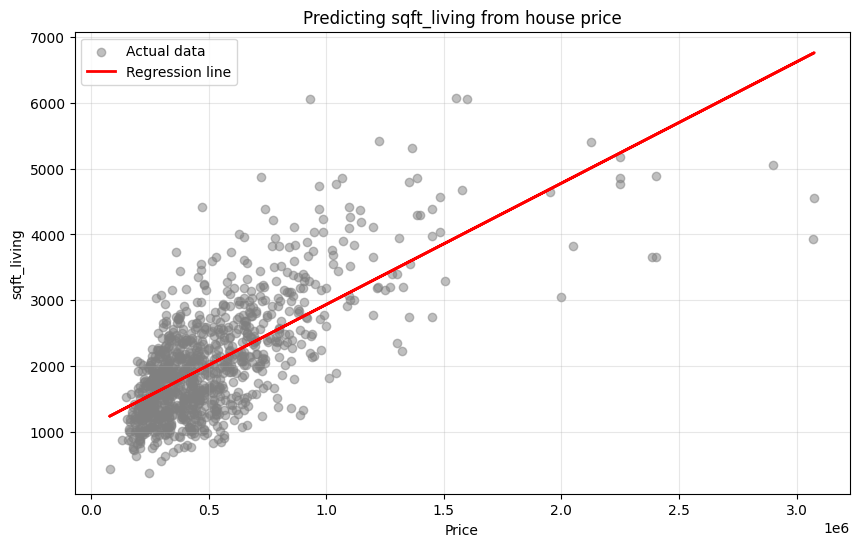

Intercept: 1091.897
Coefficient: 0.001843
R² score: 0.4967


In [496]:
#a)

X_rev = house_df.price.values.reshape(-1,1)[:1000]
y_rev = house_df.sqft_living.values.reshape(-1)[:1000]

model_rev = LinearRegression() #fitting the model
model_rev.fit(X_rev, y_rev)

y_pred_rev = model_rev.predict(X_rev) #prediciting

#plotting predictions
plt.figure(figsize=(10, 6))
plt.scatter(X_rev, y_rev, color='gray', alpha=0.5, label='Actual data')
plt.plot(X_rev, y_pred_rev, color='red', linewidth=2, label='Regression line')
plt.title('Predicting sqft_living from house price')
plt.xlabel('Price')
plt.ylabel('sqft_living')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

#printing model info
print(f"Intercept: {model_rev.intercept_:.3f}")
print(f"Coefficient: {model_rev.coef_[0]:.6f}")
print(f"R² score: {model_rev.score(X_rev, y_rev):.4f}")


#Your code:


In [497]:
"""
simple linear regression model was trained to predict house size (sqft_living)
based on house price. The resulting model has an intercept of approximately 1091.9 and a
coefficient of 0.001843.

On average, for every 1 USD increase in house price, the predicted
living area increases by about 0.00184 square feet. So for example a $100,000 increase
in price corresponds to roughly 184 additional square feet of living space.

The R² score of 0.4967 indicates that the model explains about 50% of the variance
in house size based on price. It suggests a moderate linear relationship between
price and living area - not perfect, but significant.


So y ~= 0.001843x + 1091.9
"""

'\nsimple linear regression model was trained to predict house size (sqft_living)\nbased on house price. The resulting model has an intercept of approximately 1091.9 and a\ncoefficient of 0.001843.\n\nOn average, for every 1 USD increase in house price, the predicted\nliving area increases by about 0.00184 square feet. So for example a $100,000 increase\nin price corresponds to roughly 184 additional square feet of living space.\n\nThe R² score of 0.4967 indicates that the model explains about 50% of the variance\nin house size based on price. It suggests a moderate linear relationship between\nprice and living area - not perfect, but significant.\n\n\nSo y ~= 0.001843x + 1091.9\n'

Number of features after PolynomialFeatures(degree=3): 34
Test Mean squared error: 48433163510.47
Test RMSE: 220075.36
Train R²: 0.6634
Test R²: 0.6444


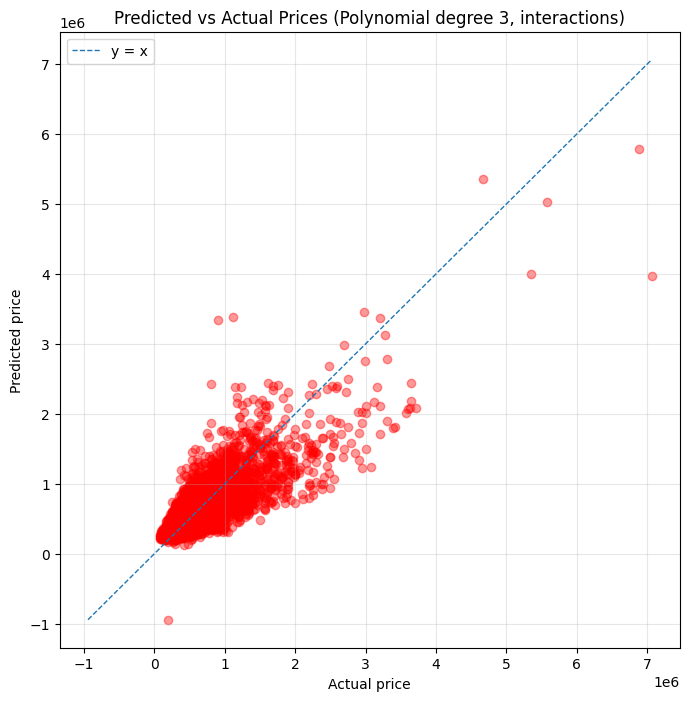

In [498]:
#b) Let's propose model, which uses living sqft, lot sqft, grade, view and all of their interactions up to third degree

X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values
y = house_df.price.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

#scaling
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=3, include_bias=False)),
    ('linreg', LinearRegression())
])

#fitting
pipeline.fit(X_train, y_train)

#transforming training set to inspect number of features created
X_train_scaled = pipeline.named_steps['scaler'].transform(X_train)
X_train_poly = pipeline.named_steps['poly'].transform(X_train_scaled)
n_features_after_poly = X_train_poly.shape[1]

#predictions
y_pred = pipeline.predict(X_test)
y_train_pred = pipeline.predict(X_train)

#metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"Number of features after PolynomialFeatures(degree=3): {n_features_after_poly}")
print(f"Test Mean squared error: {mse:.2f}")
print(f"Test RMSE: {rmse:.2f}")
print(f"Train R²: {r2_train:.4f}")
print(f"Test R²: {r2_test:.4f}")

#predicted vs actual
plt.figure(figsize=(8,8))
plt.scatter(y_test, y_pred, alpha=0.4, color='red')
max_val = max(y_test.max(), y_pred.max())
min_val = min(y_test.min(), y_pred.min())
plt.plot([min_val, max_val], [min_val, max_val], linestyle='--', linewidth=1, label='y = x')
plt.xlabel('Actual price')
plt.ylabel('Predicted price')
plt.title('Predicted vs Actual Prices (Polynomial degree 3, interactions)')
plt.legend()
plt.grid(alpha=0.3)
plt.show()

In [499]:
"""
Its almost the same prices. (predicted ones)
"""

'\nIts almost the same prices. (predicted ones)\n'

alpha=0.0: Test RMSE=220075.36, Test R²=0.6444
alpha=0.01: Test RMSE=220075.36, Test R²=0.6444
alpha=0.001: Test RMSE=220075.36, Test R²=0.6444
alpha=0.005: Test RMSE=220075.36, Test R²=0.6444
alpha=0.33: Test RMSE=220075.37, Test R²=0.6444
alpha=3.2: Test RMSE=220076.38, Test R²=0.6443
alpha=4.1: Test RMSE=220077.02, Test R²=0.6443
alpha=5.7: Test RMSE=220078.51, Test R²=0.6443
alpha=10: Test RMSE=220084.41, Test R²=0.6443


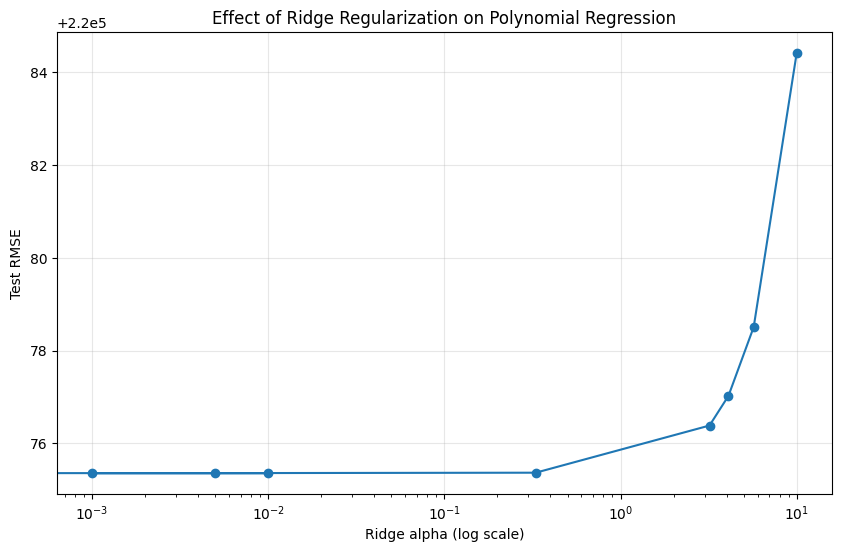

In [500]:
"""
I want to check how regularization affects polynomial
"""


X = house_df[['sqft_living', 'sqft_lot', 'grade', 'view']].values
y = house_df.price.values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=43)

alphas = [0.0, 0.01, 0.001, 0.005, 0.33, 3.2, 4.1, 5.7, 10]
rmse_list = []
r2_list = []

for a in alphas:
    pipeline = Pipeline([
        ('scaler', StandardScaler()),
        ('poly', PolynomialFeatures(degree=3, include_bias=False)),
        ('ridge', Ridge(alpha=a))
    ])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    r2 = r2_score(y_test, y_pred)
    
    rmse_list.append(rmse)
    r2_list.append(r2)
    
    print(f"alpha={a}: Test RMSE={rmse:.2f}, Test R²={r2:.4f}")

# Plot RMSE vs alpha
plt.figure(figsize=(10,6))
plt.plot(alphas, rmse_list, marker='o', linestyle='-')
plt.xscale('log')
plt.xlabel('Ridge alpha (log scale)')
plt.ylabel('Test RMSE')
plt.title('Effect of Ridge Regularization on Polynomial Regression')
plt.grid(alpha=0.3)
plt.show()
